In [1]:
from src import ImagePixelExtractor

In [2]:
tab = ImagePixelExtractor.extract_pixel_values_from_directory("./chest_Xray/test/PNEUMONIA", 0,0)

Extracting pixel values from directory: ./chest_Xray/test/PNEUMONIA at coordinates (0, 0)


In [3]:
tab.size

390

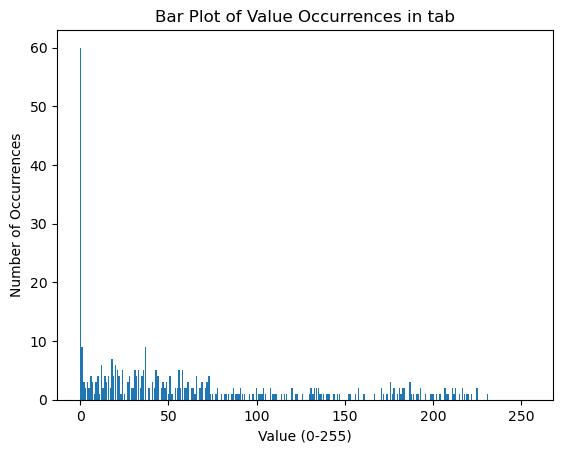

In [5]:
import matplotlib.pyplot as plt

# Calculate the occurrences of each value in the range 0-255
occurrences = [list(tab).count(i) for i in range(256)]

# Create a bar plot
plt.bar(range(256), occurrences)
plt.xlabel('Value (0-255)')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot of Value Occurrences in tab')
plt.show()

In [6]:
from src.Pixel import Pixel

In [7]:
Pixel.shapiro_wilk_test(tab)

ShapiroResult(statistic=np.float64(0.8455661321833262), pvalue=np.float64(4.0621252252314655e-19))

In [8]:
Pixel.exp_test(tab)

(0.0, 63.30769230769231)

# Test des plus grandes occurences

In [17]:
max_x = 512
max_y = 512

In [12]:
import numpy as np

In [18]:
new_tab = ImagePixelExtractor.extract_pixel_values_from_directory("./chest_Xray/test/PNEUMONIA", 0, 0, max_x, max_y, low_mem=False)

Loading all images from directory: ./chest_Xray/test/PNEUMONIA


In [7]:
print(new_tab.shape)

(390, 32, 32)


In [19]:
reshaped_tab = new_tab.transpose(1, 2, 0)
print(reshaped_tab.shape)

(512, 512, 390)


In [20]:
most_occurring_values = np.zeros((max_x, max_y), dtype=int)

# Iterate over each pixel position
for i in range(max_x):
    for j in range(max_y):
        temp_tab = new_tab[:, i, j]
        most_occurring_values[i, j] = max(set(temp_tab), key=list(temp_tab).count)

In [15]:
import matplotlib.pyplot as plt

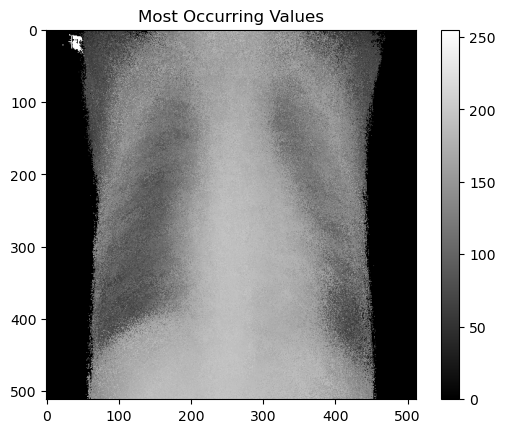

In [21]:
plt.imshow(most_occurring_values, cmap='gray')
plt.colorbar()
plt.title('Most Occurring Values')
plt.show()